In [25]:
#load dataset
import pandas as pd

data = pd.read_csv('../data/ObesityDataSet_raw.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
#split test and train data first before EDA to avoid data leakage
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['NObeyesdad'])

In [ ]:
#check the shapes
train_data.shape, test_data.shape

((1688, 17), (423, 17))

In [6]:
#data types
train_data.dtypes

 Gender                            object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
#look for imposible values
train_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.448979,1.701613,86.598197,2.421880,2.685886,2.006181,1.004208,0.644357
std,6.477100,0.093270,26.099410,0.537088,0.782557,0.609598,0.839721,0.602679
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.998636,1.629932,66.000000,2.000000,2.658599,1.591831,0.132315,0.000000
50%,22.851747,1.700747,82.977398,2.392422,3.000000,2.000000,1.000000,0.609316
75%,26.000000,1.767371,106.736879,3.000000,3.000000,2.458165,1.646370,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
#check for missing values
train_data.isnull().sum()

 Gender                           0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

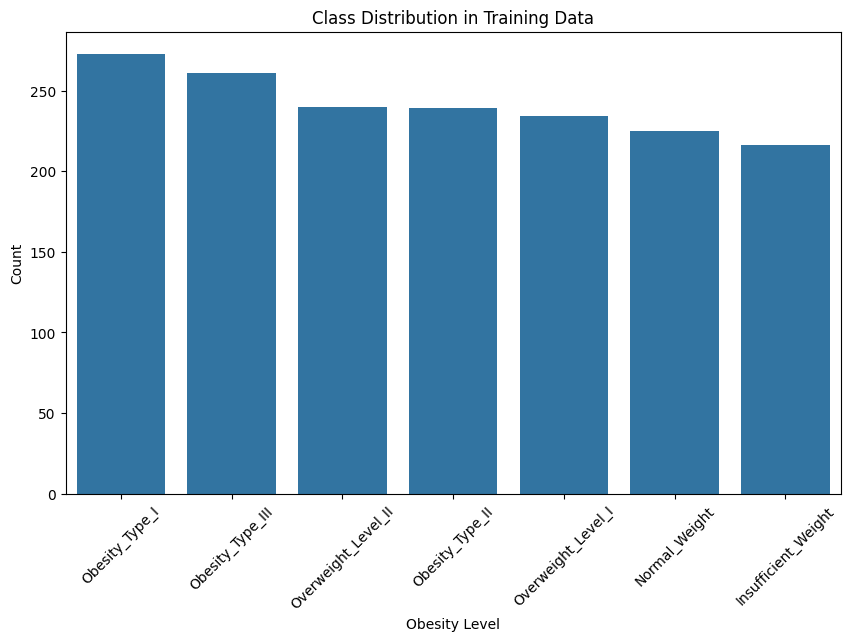

NObeyesdad
Obesity_Type_I         16.172986
Obesity_Type_III       15.462085
Overweight_Level_II    14.218009
Obesity_Type_II        14.158768
Overweight_Level_I     13.862559
Normal_Weight          13.329384
Insufficient_Weight    12.796209
Name: proportion, dtype: float64

In [11]:
#EDA
#class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x='NObeyesdad', order=train_data['NObeyesdad'].value_counts().index)
plt.title('Class Distribution in Training Data')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#class destribution in percentage
class_counts = train_data['NObeyesdad'].value_counts(normalize=True) * 100
class_counts




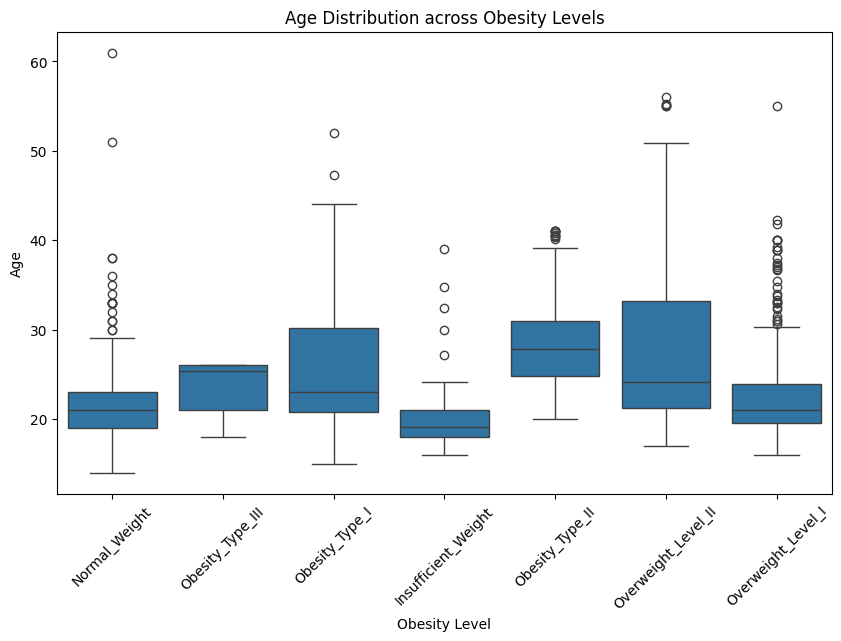

In [14]:
#checking relationship between age and target variable
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x='NObeyesdad', y='Age')
plt.title('Age Distribution across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

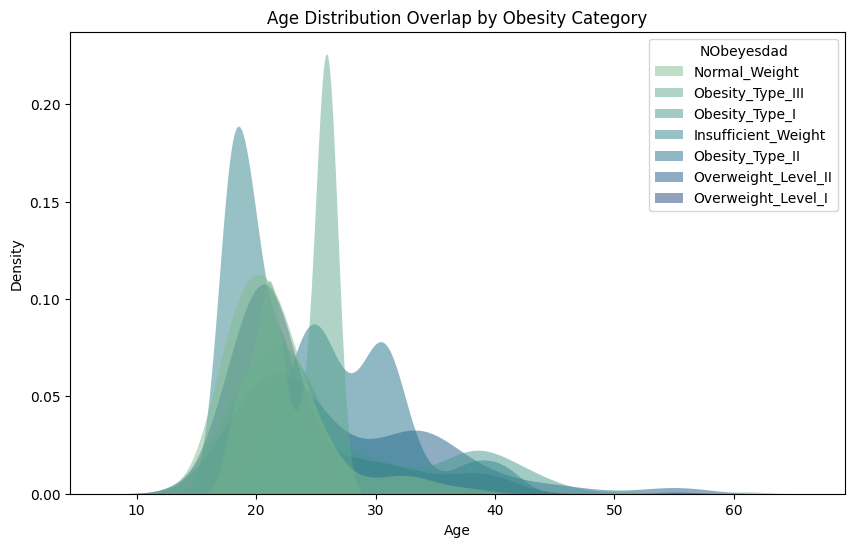

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_data, x='Age', hue='NObeyesdad', fill=True, common_norm=False, palette='crest', alpha=.5, linewidth=0)
plt.title('Age Distribution Overlap by Obesity Category')
plt.show()

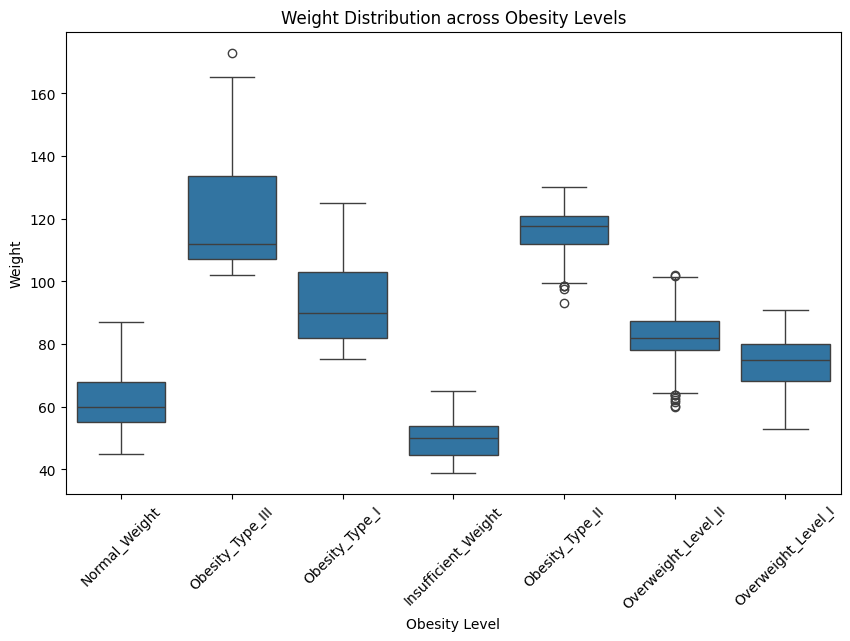

In [16]:
#checking relationship between weight and target variable
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x='NObeyesdad', y='Weight')  
plt.title('Weight Distribution across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

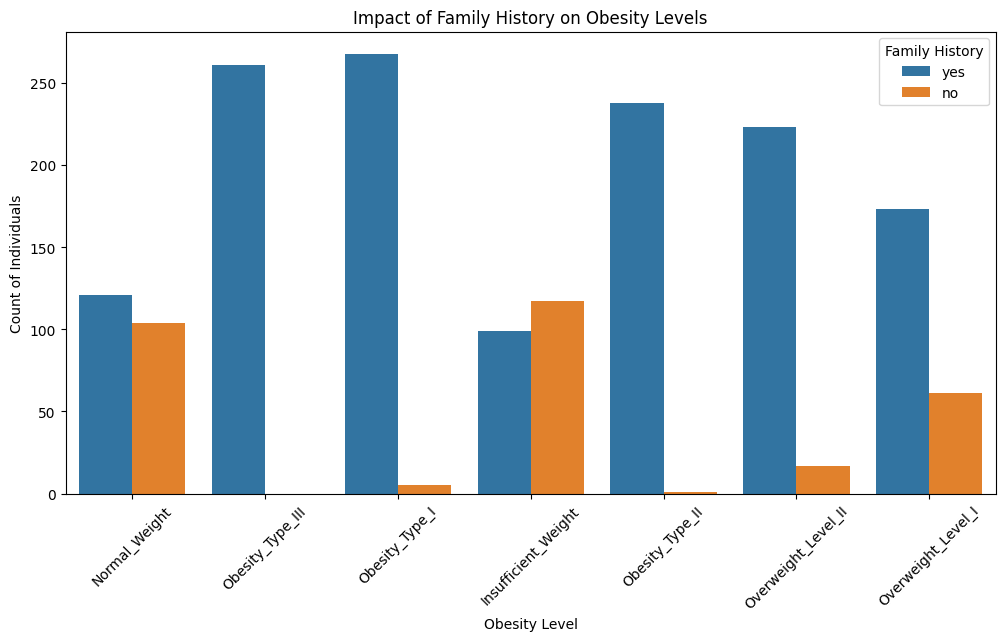

In [ ]:
#wrelationship between family history with overweight and target variable
plt.figure(figsize=(12, 6))
# Use 'hue' to split the bars by Yes/No
sns.countplot(data=train_data, x='NObeyesdad', hue='family_history_with_overweight')

plt.title('Impact of Family History on Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Family History', loc='upper right')
plt.show()

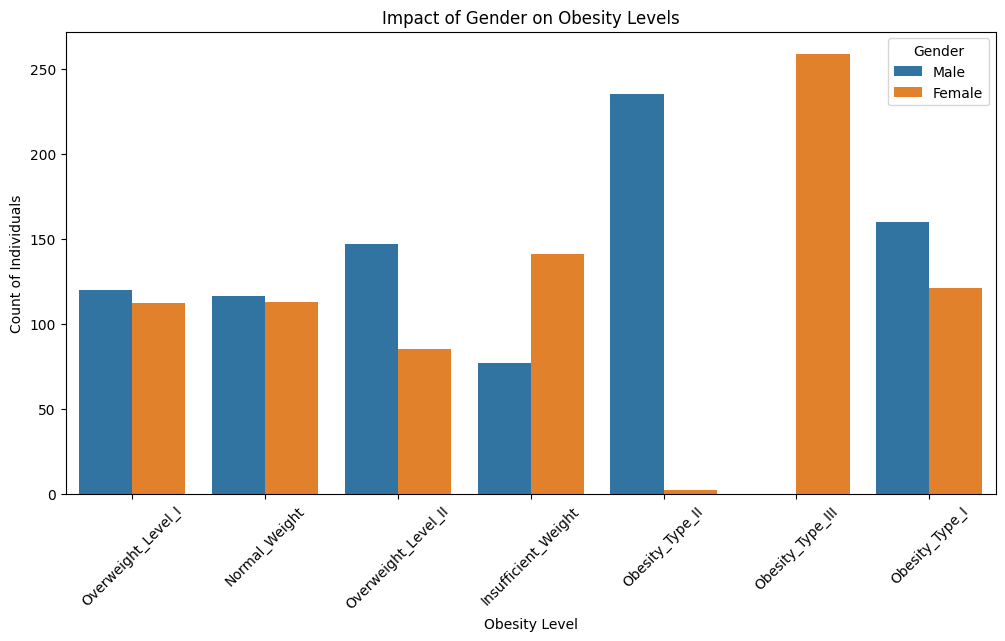

In [27]:
#wrelationship between gender and target variable
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='NObeyesdad', hue='Gender')

plt.title('Impact of Gender on Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

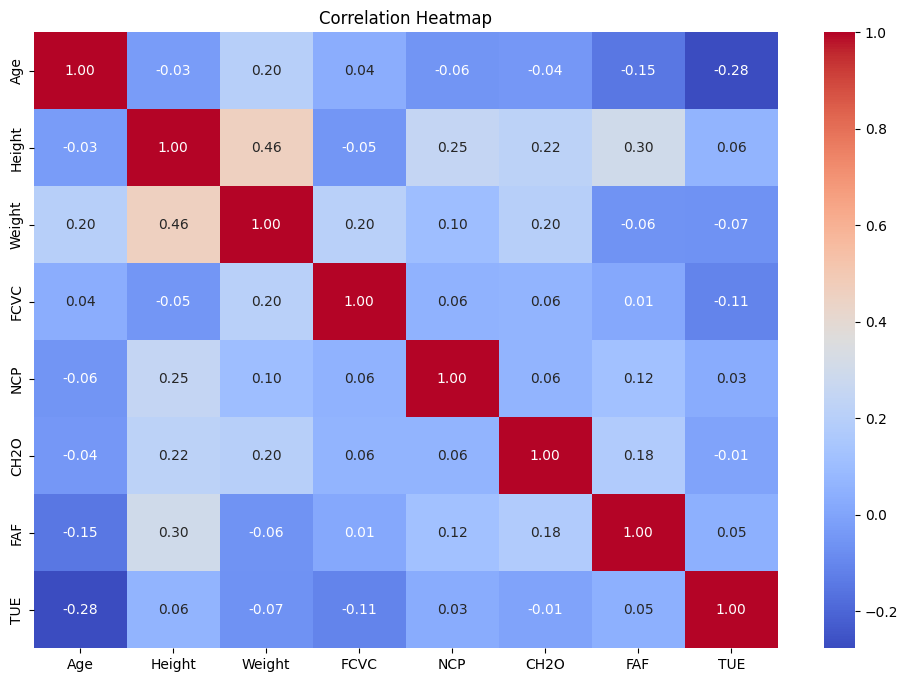

In [29]:
#categorial features 
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']           

#numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


#correlation heatmap
plt.figure(figsize=(12,8))
corr = train_data[numerical_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
#Cardinality Check (Categorical Variables)
for col in categorical_features:
    cardinality = train_data[col].nunique()
    print(f'Cardinality of {col}: {cardinality}')

Cardinality of Gender: 2
Cardinality of family_history_with_overweight: 2
Cardinality of FAVC: 2
Cardinality of CAEC: 4
Cardinality of SMOKE: 2
Cardinality of SCC: 2
Cardinality of CALC: 4
Cardinality of MTRANS: 5


In [31]:
#unique values of categorical features
for col in categorical_features:
    unique_values = train_data[col].unique()
    print(f'Unique values in {col}: {unique_values}')

Unique values in Gender: ['Male' 'Female']
Unique values in family_history_with_overweight: ['yes' 'no']
Unique values in FAVC: ['yes' 'no']
Unique values in CAEC: ['Frequently' 'Sometimes' 'Always' 'no']
Unique values in SMOKE: ['no' 'yes']
Unique values in SCC: ['no' 'yes']
Unique values in CALC: ['Frequently' 'no' 'Sometimes' 'Always']
Unique values in MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


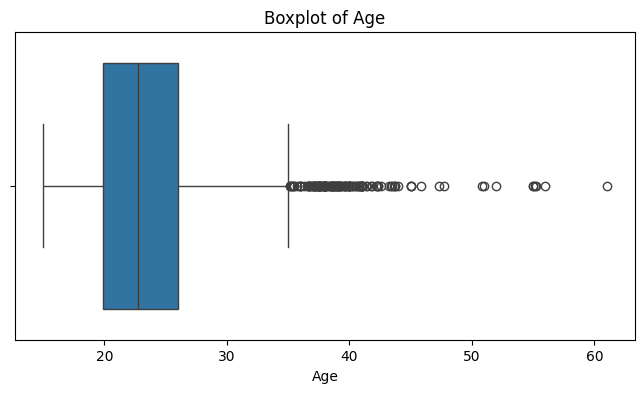

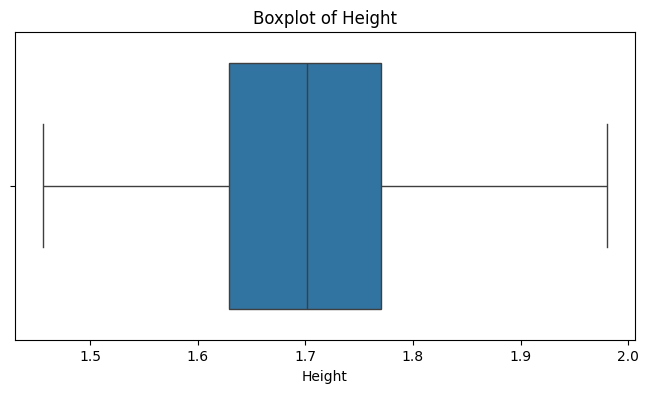

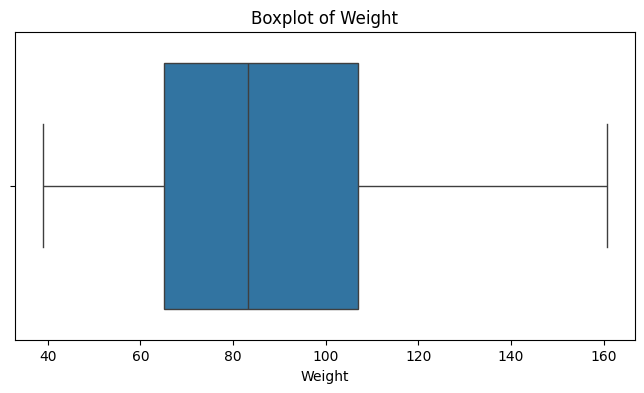

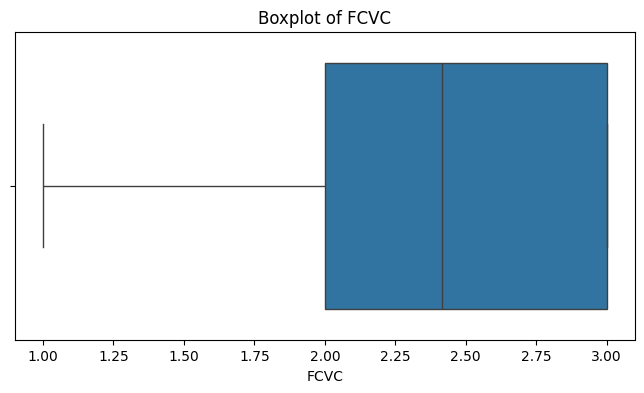

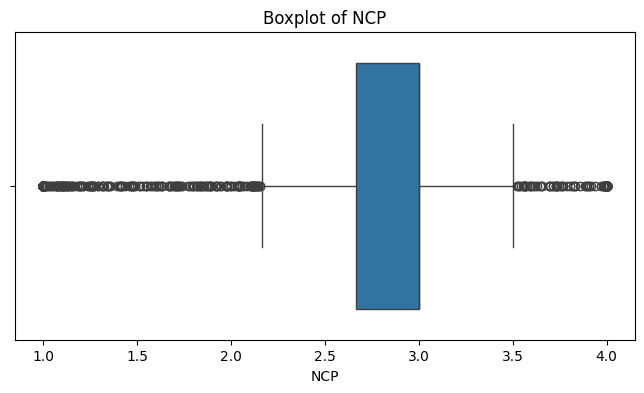

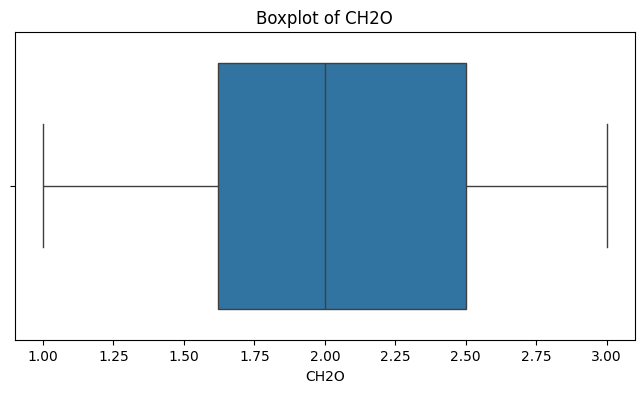

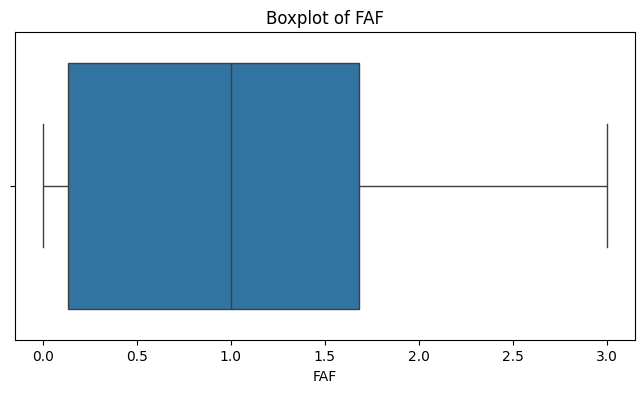

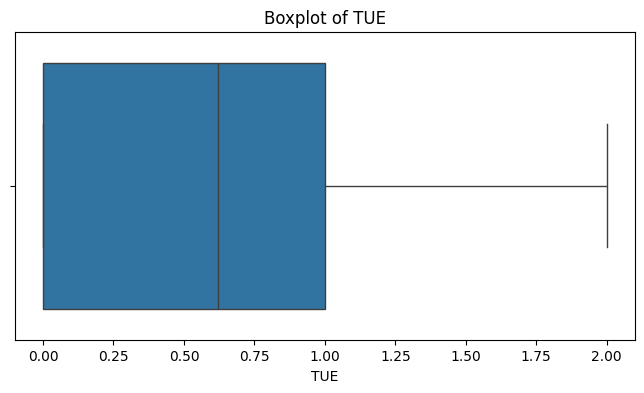

In [32]:
#outlier detection for numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()  